In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Haciendo gráficos y viendo estacionariedad

In [56]:
# Chequenado y guardando el nombre del archivo para leer
if os.path.exists('../../Data/googleStock/Google_Stock_Train (2010-2022).csv'):
    filename = '../../Data/googleStock/Google_Stock_Train (2010-2022).csv'

In [57]:
# leyendo con pandas
import pandas as pd
df = pd.read_csv(filename)  # esta línea abre el archivo, lo lee y crea el dataframe
print(df.dtypes)    # Siempre es importante saber qué tipo de dato es cada columna
df.head() # Mirando las primeras columnas

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object


,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,15.689439,15.753504,15.621622,15.684434,15.684434,78169752
1,2010-01-05,15.695195,15.711712,15.554054,15.615365,15.615365,120067812
2,2010-01-06,15.662162,15.662162,15.174174,15.221722,15.221722,158988852
3,2010-01-07,15.250250,15.265265,14.831081,14.867367,14.867367,256315428
4,2010-01-08,14.814815,15.096346,14.742492,15.065566,15.065566,188783028


En la información anterior se puede ver que los timestamps (fechas), son de tipo objeto. Vamos a convertirlos a objetos datetime para poder manejarlos mejor. También vamos a hacer una inspección ocular para ver si existe alguna estacionariedad

In [59]:
df.Date = pd.to_datetime(df.Date) # casting como objetos datetime

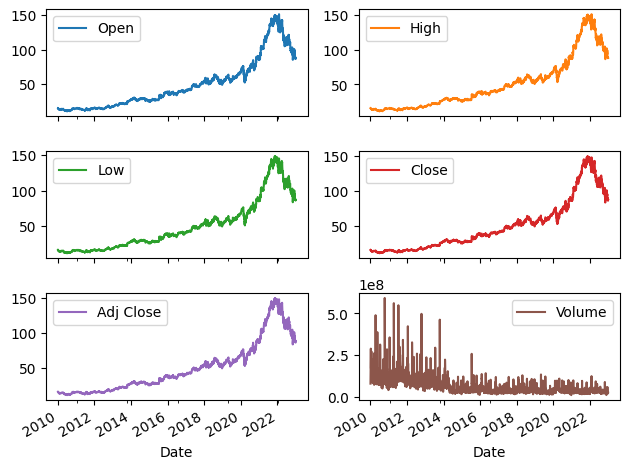

In [64]:
# Pandas tiene wrappers de matplotlib para dibujar rápidamente
df.plot(x = 'Date', subplots=True, layout=(3,2))
plt.tight_layout()
plt.show()

Claramente esta ST no es estacionaria, en ninguna de sus variables. De todos modos cuantifiquemos un poco cómo se mueve la distribución de los datos

# Analizando la media cada 60 dias 

Veremos la evolución de las medias y las varianazas, una manera de observar cómo varía la distribución de datos en ventanas temporales

In [117]:
# timedelta nos sirve para operar con intervalos de tiempo
from datetime import timedelta

delta = timedelta(days = 60) # estos 60 días son corridos, no se corresponden con días con datos
d = df.Date.iloc[0]
medias = []
varianzas = []
while d < df.Date.iloc[-1]:  # while se ejecuta siempre que se cumpla la condición
    mask_1 = df.Date >= d
    mask_2 = df.Date < d + delta
    medias.append(df.loc[mask_1 & mask_2].mean().to_numpy()) # & es el operador and bit a bit, sino no funciona
    varianzas.append(df.loc[mask_1 & mask_2].std().to_numpy())
    d += delta

In [119]:
medias[0]

array([Timestamp('2010-02-02 09:08:34.285714176'), 13.934494000000003,
       14.048018238095237, 13.766373595238095, 13.90083542857143,
       13.90083542857143, 146522568.85714287], dtype=object)

In [112]:
# veamos la estructura de los datos obtenidos en las listas
print(f'N de elementos de medias: {len(medias)} - varianzas {len(varianzas)} - tstamps {len(tstamps)}')
pd.concat([medias[0].T,medias[1].T],axis=1)

N de elementos de medias: 80 - varianzas 80 - tstamps 80


,0,1
Date,2010-02-02 09:08:34.285714176,2010-04-03 12:52:40.975609856
Open,13.934494,14.012842
High,14.048018,14.143522
Low,13.766374,13.895719
Close,13.900835,14.013367
Adj Close,13.900835,14.013367
Volume,146522568.857143,142126609.170732


In [114]:
medias[0].set_index()

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

<BarContainer object of 80 artists>

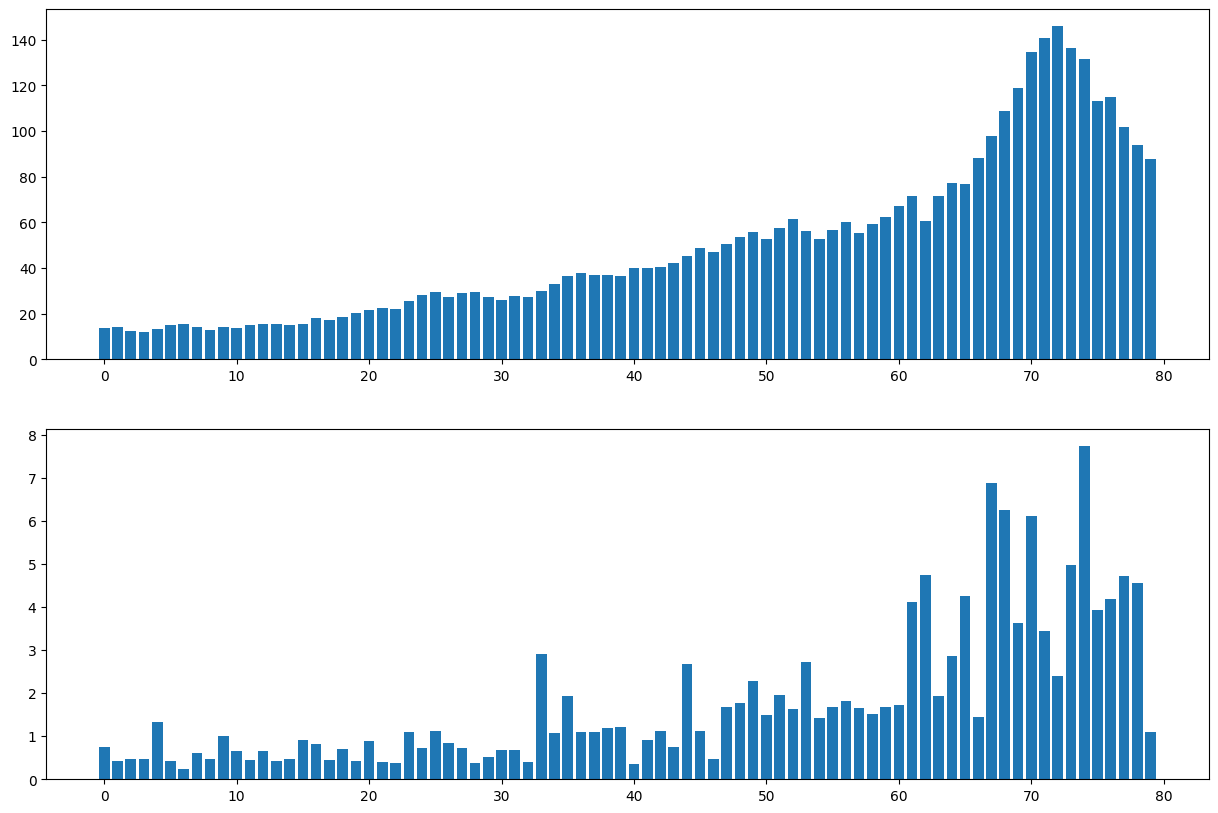

In [54]:
fig, axs = plt.subplots(2,1, figsize = (15,10))
axs[0].bar(np.arange(len(medias)), medias)
axs[1].bar(np.arange(len(varianzas)), varianzas)


In [52]:
medias

[13.90083542857143,
 14.013367,
 12.192704325581396,
 11.963878512195121,
 13.394310952380952,
 14.931785414634147,
 15.395651899999999,
 14.288957558139534,
 12.956133024390244,
 13.930290720930229,
 13.559388658536587,
 15.174174142857142,
 15.356382025641024,
 15.629458804878048,
 14.86079686046512,
 15.29703480487805,
 17.99983681395349,
 17.015554076923078,
 18.55893385,
 20.151633414634144,
 21.516809658536587,
 22.367600441860464,
 21.905814292682926,
 25.69779072093024,
 28.28891087179487,
 29.389161404761904,
 27.302365853658536,
 29.135073170731708,
 29.41250006976744,
 27.40884165853659,
 26.096768536585365,
 27.8178502,
 27.46752378571428,
 29.692119095238095,
 32.834219731707314,
 36.55563960465116,
 37.69267953846155,
 36.80478561904762,
 37.04418307317073,
 36.490881,
 40.0383095,
 40.0262073902439,
 40.58556107317073,
 42.23997536585366,
 45.264069906976744,
 48.555737675,
 47.07416654761904,
 50.54954665116279,
 53.741591973684216,
 55.8283254883721,
 52.48696299999999

In [53]:
varianzas

[0.7397756677858545,
 0.41506337266060944,
 0.4738378340280725,
 0.4637372520413969,
 1.3231085084241903,
 0.4200462866563026,
 0.23868531287126007,
 0.6190698054213235,
 0.4680021223794017,
 1.0054601668803036,
 0.6536337660968722,
 0.4581236381071334,
 0.6677482219596612,
 0.4225440777793021,
 0.4740916460296711,
 0.9057633943462613,
 0.8274129458859287,
 0.44427183088524236,
 0.6944104165084679,
 0.41558625523662224,
 0.8948760538689315,
 0.3948981236206495,
 0.3694642997778845,
 1.0922663887580009,
 0.7307815314414453,
 1.1320436259824378,
 0.8423840418154468,
 0.7161683107082407,
 0.378348328610554,
 0.5124485262217862,
 0.6887016623588217,
 0.6759049626036686,
 0.3997270189936966,
 2.9106330696063174,
 1.0819885513544498,
 1.9465178304873052,
 1.089252973636951,
 1.0877663153562462,
 1.1963590506918769,
 1.2130944260926366,
 0.35568446494962375,
 0.9221439336486708,
 1.1182956001559334,
 0.754175918854273,
 2.6869022000514233,
 1.1297810640353698,
 0.46479460759078645,
 1.6813850